In [31]:
from PIL import Image, ImageDraw 
import pandas as pd

- Создать классификатор, определяющий пиксели собаки на изображении. 
- С помощью классифицируемых пикселей выделить собаку.
- Выделить - значит закрасить пиксели собаки, например, красным цветом.
- Вывести новую картинку на экран

# Создать классификатор, определяющий пиксели собаки на изображении. 


## Собака

In [32]:
# Открываем изображения
img0 = Image.open('sobaka4.jpg')
img1 = Image.open('Sobaka5.jpg')
img2 = Image.open('Sobaka6.jpg')
img3 = Image.open('sobaka7.jpg')
img4 = Image.open('sobaka8.jpg')
img5 = Image.open('sobaka9.jpg')
img6 = Image.open('sobaka10.jpg')
img7 = Image.open('sobaka11.jpg')
img8 = Image.open('sobakaa.jpg')
img9 = Image.open('sobakaaa.jpg')
img10 = Image.open('sobakaaaa.jpg')
img11 = Image.open('sobakaaaaa.jpg')
images = [img0, img1, img2, img3, img4, img5, img6, img7, img8, img9, img10, img11]

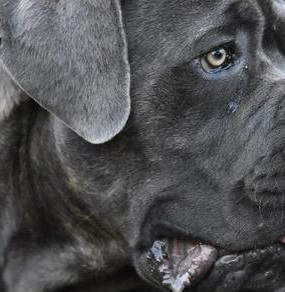

In [33]:
img0

In [34]:
def dataset_create(images):
    pixels = []
    for img in images:
        h = img.size[1]
        w = img.size[0]
        pix = img.load() # выгрузка пикселей
        
        for i in range(h):
            for k in range(w):
                p = pix[k, i]
                pixels.append(p)
    df = pd.DataFrame(pixels)
    df.drop_duplicates(inplace = True)
    df.rename(columns= {0:'r', 1:'g', 2:'b'}, inplace = True)
    return df

In [35]:
df_dog = dataset_create(images)

In [36]:
df_dog['is_dog'] = 1

In [37]:
df_dog

,r,g,b,is_dog
0,135,136,140,1
1,129,130,134,1
2,125,126,130,1
3,111,112,116,1
4,107,108,112,1
...,...,...,...,...
1489370,122,109,67,1
1489371,129,116,74,1
1489372,148,133,92,1
1489373,158,143,102,1


## Не собака (кошка)

In [38]:
img0 = Image.open('koshka1.jpg')
img1 = Image.open('koshka2.jpg')
img2 = Image.open('koshka3.jpg')
img3 = Image.open('koshka6.jpg')
img4 = Image.open('koshka7.jpg')
img5 = Image.open('koshka8.jpg')
img6 = Image.open('koshka9.jpg')
img7 = Image.open('koshka10.jpg')
images = [img0, img1, img2, img3, img4, img5, img6, img7]

In [39]:
df_not_dog = dataset_create(images)
df_not_dog['is_dog'] = 0


In [40]:
df_not_dog

,r,g,b,is_dog
0,57,48,33,0
1,65,56,41,0
2,80,71,56,0
3,87,78,63,0
4,96,87,72,0
...,...,...,...,...
1598639,227,223,224,0
1598894,210,194,194,0
1598895,205,189,189,0
1598900,217,205,205,0


## Объединение

In [41]:
df = df_dog.append(df_not_dog)

df

,r,g,b,is_dog
0,135,136,140,1
1,129,130,134,1
2,125,126,130,1
3,111,112,116,1
4,107,108,112,1
...,...,...,...,...
1598639,227,223,224,0
1598894,210,194,194,0
1598895,205,189,189,0
1598900,217,205,205,0


## Создание модели

In [225]:
from sklearn.model_selection import train_test_split
x = df.drop('is_dog', axis = 1)
y = df['is_dog']

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, random_state = 1)

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(x_tr, y_tr)
y_pred = sgd_clf.predict(x_ts)

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_ts)

0.6113759604200455

In [226]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() # наивный байес
nb.fit(x_tr, y_tr)
pred = nb.predict(x_ts)
accuracy_score(pred, y_ts)

0.5953047951376943

In [72]:
x_ts

,r,g,b
422431,189,192,199
1221813,171,149,91
4532,86,84,85
681443,157,124,91
185253,121,41,6
...,...,...,...
1082771,211,192,162
1205107,197,175,161
731894,167,134,91
1380613,134,77,50


In [46]:
from sklearn.model_selection import cross_val_score

cross_val_score(nb, x, y, cv = 10)

array([0.57451775, 0.70412844, 0.6514171 , 0.6671445 , 0.47317333,
       0.57335354, 0.41530144, 0.54570773, 0.58625491, 0.57044561])

## RGB to HSV

In [205]:
import colorsys

hsv_pixels = []
for i in range(len(df)):
    r = df.iloc[i, 0]
    g = df.iloc[i, 1]
    b = df.iloc[i, 2]
    hsv_pix = colorsys.rgb_to_hsv(r, g, b)
    hsv_pixels.append(hsv_pix)
    
df_hsv = pd.DataFrame(hsv_pixels)  

In [206]:
df_hsv['is_dog'] = df['is_dog'].values

In [228]:
x = df_hsv.drop('is_dog', axis = 1)
y = df_hsv['is_dog']

cross_val_score (GaussianNB(), x, y, cv = 10) # почти все оценки выше 90%

array([0.41806938, 0.67701507, 0.73971986, 0.55475917, 0.53415793,
       0.60919069, 0.51331094, 0.57638434, 0.51159076, 0.62237877])

In [229]:
x_tr2, x_ts2, y_tr2, y_ts2 = train_test_split(x, y, random_state = 1)
nb.fit(x_tr2, y_tr2)
pred_2 = nb.predict(x_ts2)
accuracy_score(pred_2, y_ts2)

0.598941694926361

## С помощью классифицируемых пикселей выделить собаку

In [106]:
"""
img0 = Image.open('b.jpg')
images = [img0]
"""

In [208]:
"""
def dataset_create_full_img(images):
    pixels = []
    for img in images:
        h = img.size[1]
        w = img.size[0]
        pix = img.load() # выгрузка пикселей
        
        for i in range(h):
            for k in range(w):
                p = pix[k, i]
                pixels.append(p)
    df = pd.DataFrame(pixels)
    #df.drop_duplicates(inplace = True)
    df.rename(columns= {0:'r', 1:'g', 2:'b'}, inplace = True)
    return df
x_ts_real = dataset_create_full_img(images)

hsv_pixels = []
for i in range(len(x_ts_real)):
    r = x_ts_real.iloc[i, 0]
    g = x_ts_real.iloc[i, 1]
    b = x_ts_real.iloc[i, 2]
    hsv_pix = colorsys.rgb_to_hsv(r, g, b)
    hsv_pixels.append(hsv_pix)
    
x_ts_real = pd.DataFrame(hsv_pixels)  
"""

In [209]:
"""
x_tr_real = df_hsv.drop('is_dog', axis = 1)
y_tr_real = df_hsv['is_dog']
"""

In [210]:
"""
nb = GaussianNB() # наивный байес
nb.fit(x_tr_real, y_tr_real)
y_pred_real = nb.predict(x_ts_real)
"""

In [182]:
"""
predicted_df = x_ts_real.copy().reset_index()
predicted_df.drop('index', axis = 1, inplace = True)
y_pred_real_df = pd.DataFrame(y_pred_real)
predicted_df = predicted_df.join(y_pred_real_df)
predicted_df.rename(columns= {0:'is_dog'}, inplace = True)
df_for_draw = predicted_df.copy()
df_for_draw
for i in range(len(df_for_draw)):
  if df_for_draw['is_dog'][i] == 1:
    df_for_draw['r'][i] = 255
    df_for_draw['g'][i] = 0
    df_for_draw['b'][i] = 0
  else:
    continue  

df_for_draw.drop('is_dog', axis = 1, inplace = True)
"""

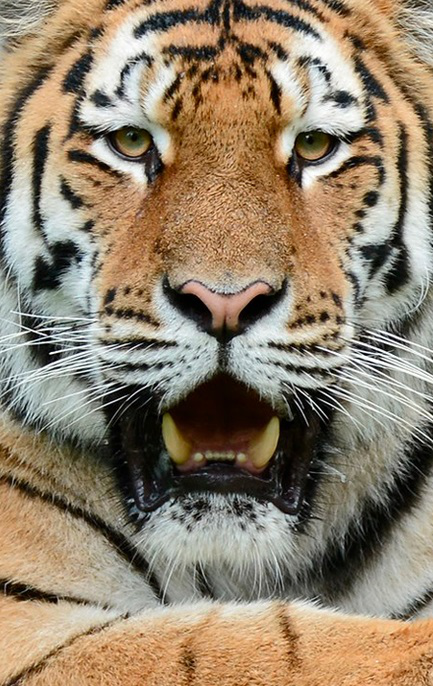

In [204]:
image = Image.open('b.jpg')  # Открываем изображение
draw = ImageDraw.Draw(image)  # Создаем инструмент для рисования
width = image.size[0]  # Определяем ширину
height = image.size[1]  # Определяем высоту
pix = image.load()  # Выгружаем значения пикселей
image

In [243]:
for y in range(height):
  for x in range(width):
    r = pix[x, y][0] #узнаём значение красного цвета пикселя
    g = pix[x, y][1] #зелёного
    b = pix[x, y][2] #синего
    pred = nb.predict([pix[x, y]])[0]
    if pred == 1:
      draw.point((x,y), (255, 0, 0))
    else:
      draw.point((x,y),(r,g,b))  

In [245]:
pred

0

In [244]:
image.save("result.jpg", "JPEG")